In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"/content/RTA Dataset.csv")

In [5]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.shape

(12316, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [10]:
df.describe(include=object)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [11]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [27]:
df.drop(columns=['Type_of_collision','Vehicle_movement','Work_of_casuality','Fitness_of_casuality'],axis=1,inplace=True)


In [30]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [31]:
df.drop(columns=['Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction'], axis=1, inplace=True)

In [32]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,0


In [37]:
df.duplicated().sum()

1

In [38]:
city_acc = df['Cause_of_accident'].value_counts().sort_values(ascending = False).reset_index()

In [39]:
city_acc

,Cause_of_accident,count
0,No distancing,2263
1,Changing lane to the right,1808
2,Changing lane to the left,1473
3,Driving carelessly,1402
4,No priority to vehicle,1207
5,Moving Backward,1137
6,No priority to pedestrian,721
7,Other,456
8,Overtaking,430
9,Driving under the influence of drugs,340


<ipython-input-42-2fac772927fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cause_of_accident',y='count',data= city_acc.head(10),palette='viridis')


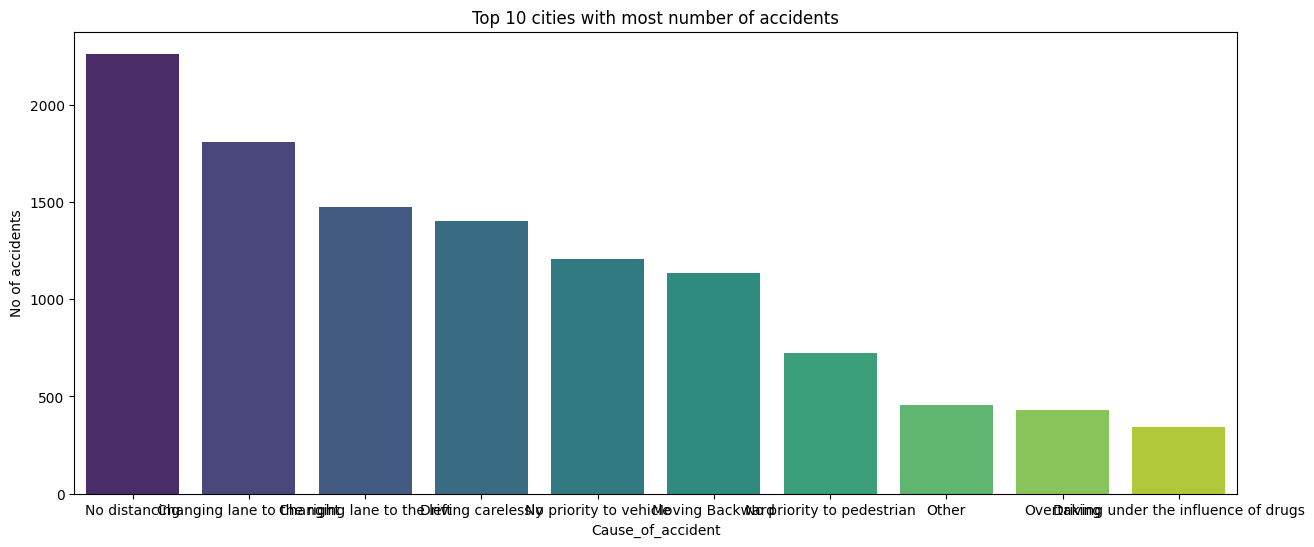

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='Cause_of_accident',y='count',data= city_acc.head(10),palette='viridis')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

<ipython-input-43-4cfc57c6948c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cause_of_accident',y='count',data= city_acc.tail(10),palette='viridis')


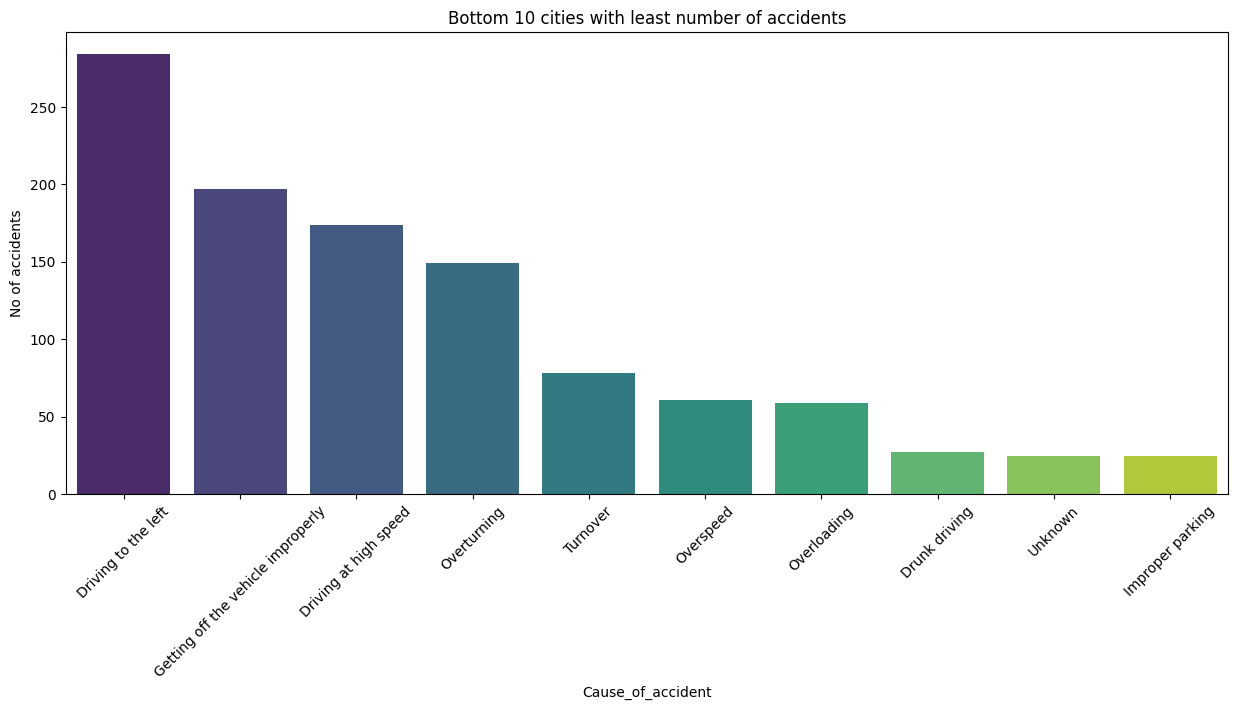

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x='Cause_of_accident',y='count',data= city_acc.tail(10),palette='viridis')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

In [44]:
state_acc = df['Owner_of_vehicle'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,Owner_of_vehicle,count
0,Owner,10941
1,Governmental,1041
2,Organization,312
3,Other,22


<ipython-input-46-d5ed817f58b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner_of_vehicle',y='count',data= state_acc.head(5),palette='rocket')


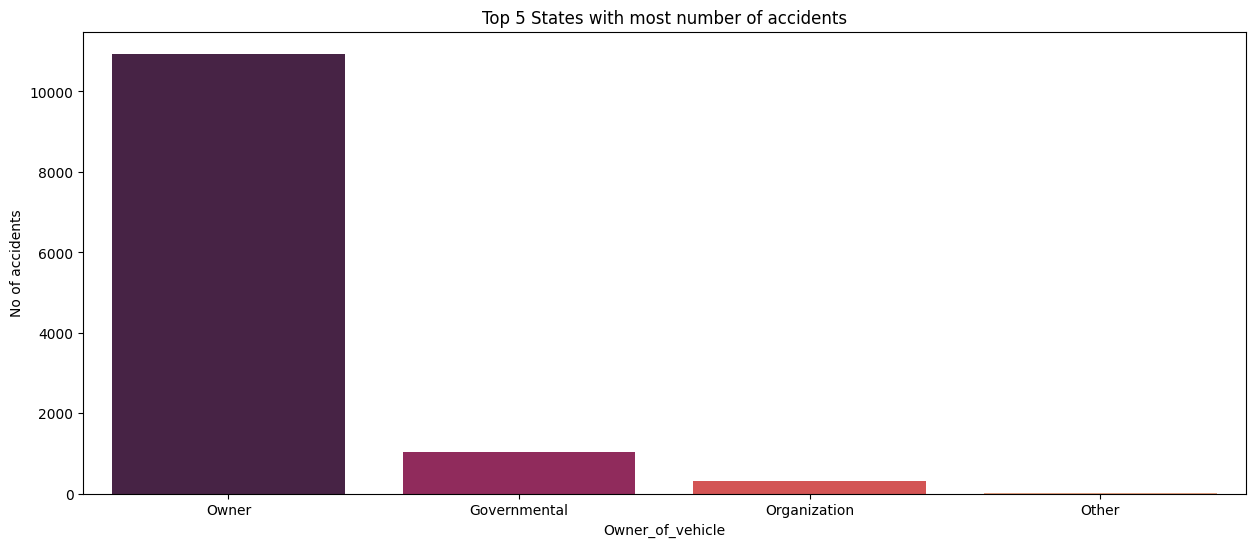

<ipython-input-46-d5ed817f58b5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner_of_vehicle',y='count',data= state_acc.tail(5),palette='rocket')


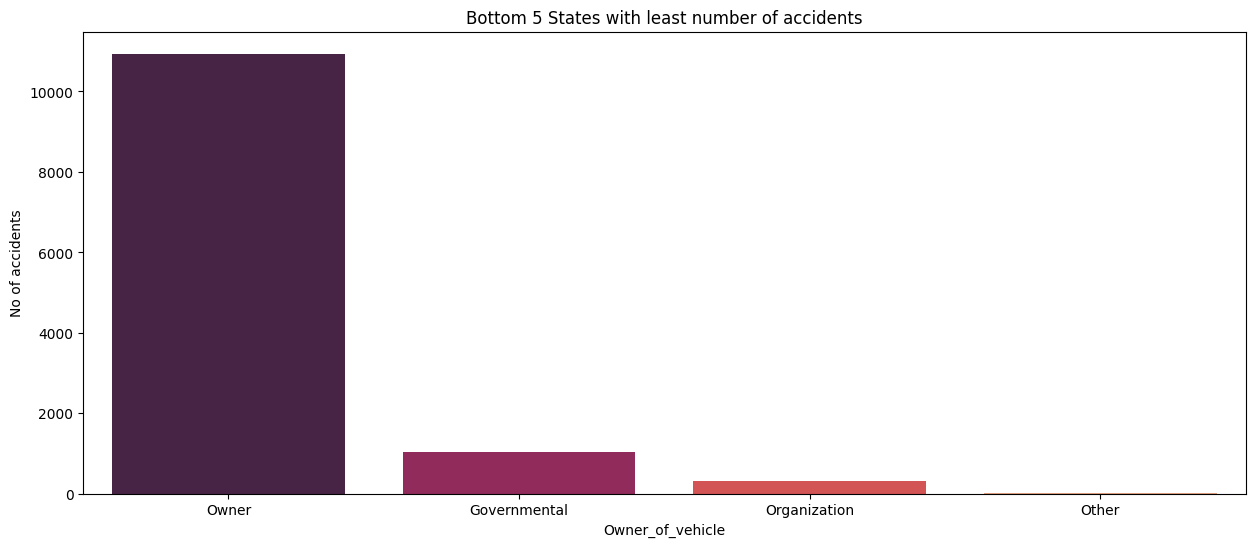

In [46]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='Owner_of_vehicle',y='count',data= state_acc.head(5),palette='rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='Owner_of_vehicle',y='count',data= state_acc.tail(5),palette='rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

In [48]:
df['Weather_conditions'].value_counts().index

Index(['Normal', 'Raining', 'Other', 'Unknown', 'Cloudy', 'Windy', 'Snow',
       'Raining and Windy', 'Fog or mist'],
      dtype='object', name='Weather_conditions')